https://pythonforundergradengineers.com/plotting-normal-curve-with-python.html

In [312]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [348]:
#Lets define our boundaries and constrains
mu = 0              #Mean 
sigma = 70.00          #Standard Deviation
lower_bound_x = -100   #Lower bound
upper_bound_x = 100   #Upper bound

In [349]:
#Lets compute z-transform
z1 = ( lower_bound_x - mu ) / sigma
z2 = ( upper_bound_x - mu ) / sigma

In [350]:
#Lets auto-generate some test data, within range provieded by z-transform
x = np.arange(z1, z2, 0.001)

In [351]:
#describe statistical properties
stats.describe(x)

DescribeResult(nobs=2858, minmax=(-1.4285714285714286, 1.4284285714282567), mean=-7.142857158593938e-05, variance=0.68091849999985, skewness=1.4166521762639368e-16, kurtosis=-1.2000002938237149)

In [352]:
#Lets auto-generate another test data - both in and out of spec.
x_all = np.arange(-15, 15, 0.001)

In [353]:
#describe statistical properties
stats.describe(x_all)

DescribeResult(nobs=30000, minmax=(-15.0, 14.998999999983376), mean=-0.0005000000083130241, variance=75.00249999991686, skewness=-3.8236397514928457e-16, kurtosis=-1.2000000026666668)

In [354]:
# mean = 0, stddev = 1, since Z-transform was calculated
#Lets generate Normal distribution for both x, and x_all
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

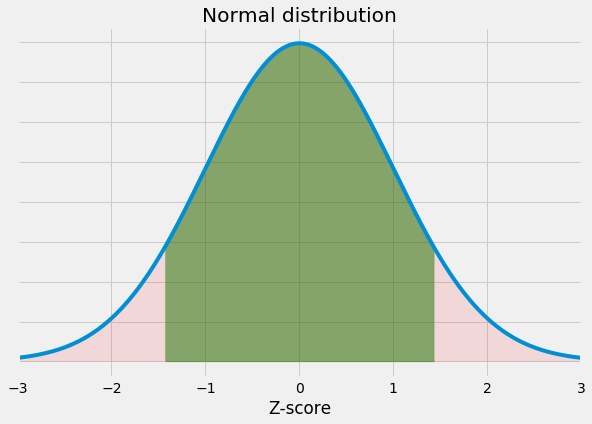

In [367]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.5, color='g')
ax.fill_between(x_all,y2,0, alpha=0.1, color='r')
ax.set_xlim([-3,3])
ax.set_xlabel('Z-score')
ax.set_yticklabels([])
ax.set_title('Normal distribution')
plt.show()

In [356]:
import pandas as pd
from scipy.stats import zscore

In [357]:
dataFrame = pd.DataFrame(data=x,columns=['x'])
dataFrame.describe()

,x
count,2858.000000
mean,-0.000071
std,0.825178
min,-1.428571
25%,-0.714321
50%,-0.000071
75%,0.714179
max,1.428429


In [358]:
#Lets inject few anomaly data
anomaly_data = [500, 501]
anomaly_dataFrame=pd.DataFrame(data=anomaly_data,columns=['x'])

frames = [dataFrame,anomaly_dataFrame]

dataFrame=pd.concat(frames,axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [359]:
#Observe statistics of new data frame, with anomaly data (max value); and compare it with original data
dataFrame.describe()

,x
count,2860.000000
mean,0.349929
std,13.258748
min,-1.428571
25%,-0.713821
50%,0.000929
75%,0.715679
max,501.000000


In [360]:
#detect index of anomaly
index_of_anomaly=np.where(dataFrame.apply(zscore)>3)

print("Index of anomaly data :",index_of_anomaly)
print("Anomaly data :")
dataFrame.iloc[index_of_anomaly]

Index of anomaly data : (array([2858, 2859], dtype=int64), array([0, 0], dtype=int64))
Anomaly data :


,x,x
0,500.0,500.0
1,501.0,501.0
